# Signal Processing

This example shows how an audio signal can be processed in a Jupyter notebook.

Mercury is the Jupyter FPGA overlay for the Red Pitaya. It is used in oscilliscope mode in this example, using channel IN2, at 30Ksps.

In [1]:
from redpitaya.overlay.mercury import mercury as overlay
fpga = overlay()
in2 = fpga.osc(1, 1.0)

# data rate decimation 
in2.decimation = 41667 #125 Msps / 41667 = 3 Ksps

# trigger timing [sample periods]
N = in2.buffer_size
in2.trigger_pre  = 0
in2.trigger_post = N

# disable hardware trigger sources - the Jupyter notebook will trigger the start of audio recording
in2.trig_src = 0

The IN2 should be reset, started, and a software trigger should be issued.
A loop is checking if the desired number of data samples was already stored in the buffer.

In [8]:
in2.reset()
in2.start()
in2.trigger()
# wait for data
while (in2.status_run()): pass
print ('Recording complete')
data = in2.data(N)

Recording complete


The audio data can then be displayed as an audio file that can be played or downloaded.

In [9]:
import IPython.display as ipd
sr = 3000 # sample rate 3 Ksps
ipd.Audio(data, rate=sr) # load a NumPy array

Once the recording has been captured it can be displayed as a waveform.

SciPi is imported to provide the Fast Fourier Transform function. This is used to translate the signal from the time domain to the frequancy domain, allowing us to show a spectrum plot. NumPy provides many numeric and data handling functions. MatPlotLib is used to generate plots.

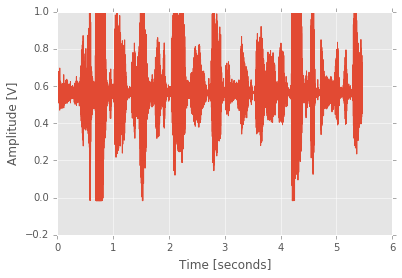

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.fftpack
audio_spectrum = sp.fftpack.fft(data)

plt.style.use('ggplot')

# sampling information
Fs = 3000 # sample rate
T = 1/Fs # sampling period
t = 5 # seconds of sampling
#N = Fs*t # total points in signal
N = data.size

t_vec = np.arange(N)*T # time vector for plotting
y=data #data is the audio recorded above

plt.plot(t_vec,y)
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [seconds]')
plt.show()

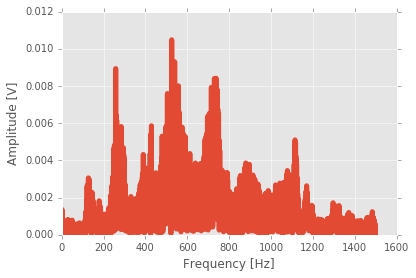

In [11]:
               
# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

Pxx = np.delete(Pxx,0) #remove the DC bias
f = np.delete(f,0) #remove the DC bias

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.ylabel('Amplitude [V]')
plt.xlabel('Frequency [Hz]')
plt.show()